# Notebook de test des données lapi post-traitees

In [1]:
%load_ext autoreload
%autoreload 
import sys #c'est pas propre mais pour le moment pour importer mes modules perso dans le notebook je ne sais pas faire
sys.path.append(r'C:\Users\martin.schoreisz\git\Outils\Outils\Martin_Perso')
import Connexion_Transfert as ct
import donnees_posttraitees as t
import graphs as g
import pandas as pd
import geopandas as gpd
import numpy as np
import altair as alt
import datetime as dt
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 50)
alt.data_transformers.enable('default', max_rows=None)
import os, math, re
from sklearn.cluster import DBSCAN
from sklearn import svm,datasets
import matplotlib.pyplot as plt

# 1. import des données, traitement de mise en forme
## 1.1 Import
Les données sont importées sur la période du 24/01/19 au 23/02/19, sur laquelle il n'y a pas de manque de données à priori

In [2]:
%time df_passages, df_plaques, df_immat=t.ouvrir_fichier_lapi_final('2019-01-23 00:00:00','2019-02-13 23:59:59')

Wall time: 2min 44s


In [ ]:
#export au format svg des données TV
for i in range(1,20) :
    chemin=os.path.join(r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\graphs\nb_veh_J_cam',f'cam{i}.svg')
    g.graph_nb_veh_jour_camera_multi_j(df_passages,'2019-01-23 00:00:00','2019-01-23 23:59:59',i,22).save(chemin)

## 1.3 Ajout de l'attribut de différenciation VL / PL

In [7]:
%time df_passages2=t.affecter_type(df_passages,df_immat)

Wall time: 4min 19s


In [8]:
%time df_passages3=t.affecter_type_nuit(df_passages2,df_immat)

Wall time: 49.1 s


### différenciation VL / PL

In [9]:
df_passages_pl=df_passages3.loc[df_passages3['l']==1].copy()

## 1.2. Suppression des doublons

### 1.2.1 Doublons

In [10]:
%time df_passages_ss_doublons=t.supprimer_doublons(df_passages_pl)

Wall time: 7.87 s


### 1.2.2 passages proches

In [ ]:
#pour visu
%time groupe_pl_rappro, groupe_pl=t.passages_proches(df_passages_ss_doublons)
jointure = g.analyse_passage_proches(groupe_pl_rappro, groupe_pl)
g.graph_passages_proches(jointure, groupe_pl_rappro)

In [11]:
#pour traitement
%time passg_recale_cam10=t.recalage_cam10(df_passages_ss_doublons)

Wall time: 1min 23s


## 1.4. Filtre des immatriculations non cohérentes

In [12]:
%time df_passages_immat_ok, df_immat_suppr=t.filtre_plaque_non_valable(passg_recale_cam10, df_plaques)

C:\Users\martin.schoreisz\git\lapi\Carto_Lapi\Analyse\donnees_posttraitees.py:173: FutureWarning: Possible nested set at position 30
  return any([re.match(retest,plque_ouvert) for retest in plaques_europ.re_plaque.tolist()])


Wall time: 5min 11s
Parser   : 111 ms


***tests sur les passages non affectés à du transit***

In [14]:
toto=df_passages_immat_ok.reset_index().set_index(['created', 'immat', 'camera_id'])

In [15]:
toto=toto.loc[~toto.index.isin(dico_passag.set_index(['created', 'immat', 'camera_id']).index.tolist())]
toto=toto.reset_index()

In [17]:
tata=toto.sort_values('created').groupby('immat').agg({'camera_id':lambda x : tuple(x),'created':lambda x: tuple(x)})

In [18]:
tata

,camera_id,created
immat,,
00011aa7a572bb6fcfd48512bef830cba4cb8134,"(4,)","(2019-01-27 14:53:42,)"
00014a425992b796c523bea440c08670ab2e3054,"(12, 6, 3)","(2019-01-29 10:47:29, 2019-01-29 11:02:00, 2019-01-29 11:13:32)"
0003436cfe0bf43a0c964731922145bfdd1d3f1b,"(3, 9)","(2019-01-29 17:50:39, 2019-01-29 18:02:20)"
0006032ce8d9b88a97bf5edc4ddd26bfadaf20e2,"(10, 1, 5, 1, 5, 11, 12, 6, 4, 3, 5, 11)","(2019-01-24 10:32:02, 2019-01-24 10:59:45, 2019-01-24 15:59:05, 2019-01-30 13:30:36, 2019-01-31 12:29:52, 2019-01-31 12:55:35, 2019-02-06 05:07:11, 2019-02-06 05:21:42, 2019-02-08 10:40:20, 2019-02-08 11:27:28, 2019-02-08 15:23:25, 2019-02-08 15:47:10)"
00062d5dae86355b884681328984f21180456f4a,"(3, 18, 13)","(2019-01-26 07:01:48, 2019-01-26 07:20:14, 2019-01-26 08:05:38)"
0007559c1ff10c1cc934891055fa02cd302b05a2,"(15, 4)","(2019-01-23 05:24:34, 2019-01-23 06:17:49)"
0007fd434cbf10c9b268b04daad05dcda44ce92a,"(4, 5)","(2019-01-28 14:26:01, 2019-01-28 14:36:59)"
00081e97bb6dd4246a7ae5fff528a81630a80289,"(3, 9, 15, 19, 4, 3, 18, 13, 15, 19, 4, 3, 9, 19, 4, 3, 13, 10, 4)","(2019-01-23 08:14:27, 2019-01-23 08:38:48, 2019-02-05 17:37:07, 2019-02-06 06:04:45, 2019-02-06 06:25:52, 2019-02-06 11:28:28, 2019-02-06 11:48:49, 2019-02-06 13:17:44, 2019-02-07 09:00:00, 2019-02-07 09:52:52, 2019-02-07 10:13:07, 2019-02-07 14:43:15, 2019-02-07 14:54:51, 2019-02-08 10:23:24, 2019-02-08 10:43:52, 2019-02-08 11:20:49, 2019-02-08 13:23:47, 2019-02-12 13:54:32, 2019-02-12 14:08:14)"
000921e0c65380cb190699a883b205490d3558dc,"(4, 18, 10)","(2019-01-23 23:12:07, 2019-01-31 10:46:59, 2019-02-04 11:03:51)"


In [20]:
df_passages_pl.loc[df_passages_pl['immat']=='fffc52d900fc8a7b3fc5a3b6c99ce7d4478b54eb']

,index,camera_id,immat,fiability,l,state
created,,,,,,
2019-01-25 03:54:00,5900202,15,fffc52d900fc8a7b3fc5a3b6c99ce7d4478b54eb,99,1.0,BE
2019-01-25 04:56:50,904260,4,fffc52d900fc8a7b3fc5a3b6c99ce7d4478b54eb,58,1.0,BE
2019-01-27 11:55:40,6885387,6,fffc52d900fc8a7b3fc5a3b6c99ce7d4478b54eb,99,1.0,BE
2019-01-27 12:06:50,701187,3,fffc52d900fc8a7b3fc5a3b6c99ce7d4478b54eb,99,1.0,BE
2019-01-27 12:26:00,1184558,18,fffc52d900fc8a7b3fc5a3b6c99ce7d4478b54eb,58,1.0,BE
2019-01-27 13:11:31,1774968,13,fffc52d900fc8a7b3fc5a3b6c99ce7d4478b54eb,99,1.0,BE


In [1]:
df_passages_pl.head(5)

NameError: name 'df_passages_pl' is not defined

# 2. Identifier les trajets de transit

In [13]:
dico_od,  dico_passag, dico_tps_max=t.transit_temps_complet('2019-01-23 00:00:00',22,df_passages_immat_ok)

date : 2019-01-23 00:00:00 debut_traitement : 2019-05-24 10:58:38.027480
date : 2019-01-24 00:00:00 debut_traitement : 2019-05-24 10:59:34.965139
date : 2019-01-25 00:00:00 debut_traitement : 2019-05-24 11:00:31.670379
date : 2019-01-26 00:00:00 debut_traitement : 2019-05-24 11:01:27.828827
date : 2019-01-27 00:00:00 debut_traitement : 2019-05-24 11:02:17.891721
date : 2019-01-28 00:00:00 debut_traitement : 2019-05-24 11:02:59.142837
date : 2019-01-29 00:00:00 debut_traitement : 2019-05-24 11:04:10.270731
date : 2019-01-30 00:00:00 debut_traitement : 2019-05-24 11:05:32.797048
date : 2019-01-31 00:00:00 debut_traitement : 2019-05-24 11:06:54.723870
date : 2019-02-01 00:00:00 debut_traitement : 2019-05-24 11:08:22.452906
date : 2019-02-02 00:00:00 debut_traitement : 2019-05-24 11:10:00.179550
date : 2019-02-03 00:00:00 debut_traitement : 2019-05-24 11:11:32.141981
date : 2019-02-04 00:00:00 debut_traitement : 2019-05-24 11:12:48.264378
date : 2019-02-05 00:00:00 debut_traitement : 2019-

# 3. Filtrer les trajets selon un temps de parcours

***Dataframe des temps de parcours de base***

In [23]:
%time dixco_tpsmax_corrige=t.corriger_df_tps_parcours(dico_tps_max)

Wall time: 2.73 s


***Ajout de l'attribut drapeau d'identification du trafic de transit selon une marge***<br> dico de stockage des differents cas

In [24]:
%%time
dico_df_transit={'df_transit_marge'+str(i):t.jointure_temps_reel_theorique(dico_od,dixco_tpsmax_corrige,t.liste_complete_trajet, i) for i in [15,30,45,600] }

In [55]:
#exemple de visu sur 3 semaines
for od in dico_df_transit['df_transit_marge15]'.o_d.unique(): 
    chemin=os.path.join(r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\graphs\transit_J_OD\marge_15_min',f'{od}.svg')
    g.graph_transit_filtre_multiple(df_transit_avec_filtre_marge30, 
                                '2019-01-23 00:00:00', '2019-01-23 23:59:59',od, 1).save(chemin)

***Filtre des données***

In [95]:
%%time
dico_od_base_marge600=df_transit_avec_filtre_marge600.loc[df_transit_avec_filtre_marge600['filtre_tps']==1]
#dico_passag_final_30=t.trajet2passage(dico_od_base_marge30,dico_passag)

***Extrapolation des trafic de transit selon la methode de prediction***

In [95]:
liste_od_ok=['A660-A62','A62-A63','A63-A62','A62-A10','A660-N10', 'A660-A10','N10-A63','A62-N10']
for od in [x for x in df_transit_avec_filtre.o_d.unique().tolist() if x not in liste_od_ok ] : 
    for date in set([a[0].strftime('%Y-%m-%d') for a in t.creer_liste_date('2019-01-31',11)]):
        try : 
            df_transit_avec_filtre=t.predire_type_trajet(df_transit_avec_filtre,od, date,600,35)
        except ValueError : 
            continue

Wall time: 141 ms


# 4. Correction des trajets depuis ou vers A660 relatifs à A63

In [14]:
%time df_od_corrige=t.correction_trajet(dico_passag_final, dico_od_base_marge15)

Wall time: 21min 10s


# 5. Extrapolation des trajets non complets

In [15]:
#creer les donnees necessaires
%time df_filtre_A63,df_passage_transit,df_non_transit=t.param_trajet_incomplet('2019-01-28 00:00:00',df_od_corrige,df_passages2,dico_passag)

Wall time: 59.1 s


In [18]:
#trajet de transit incomplet sans filtre sur temps de parcours
%time trajet_transit_incomplet2, passage2=t.transit_trajet_incomplet(df_filtre_A63,df_passage_transit,'2019-01-23 00:00:00',22, df_passages2)

date : 2019-01-31 00:00:00 debut_traitement : 2019-05-16 21:13:50.615971
date : 2019-02-01 00:00:00 debut_traitement : 2019-05-16 21:15:37.979249
date : 2019-02-02 00:00:00 debut_traitement : 2019-05-16 21:16:40.077915
date : 2019-02-03 00:00:00 debut_traitement : 2019-05-16 21:17:03.510637
date : 2019-02-04 00:00:00 debut_traitement : 2019-05-16 21:17:23.077283
date : 2019-02-05 00:00:00 debut_traitement : 2019-05-16 21:18:07.226284
date : 2019-02-06 00:00:00 debut_traitement : 2019-05-16 21:19:00.164409
date : 2019-02-07 00:00:00 debut_traitement : 2019-05-16 21:19:45.334828
date : 2019-02-08 00:00:00 debut_traitement : 2019-05-16 21:20:19.822434
date : 2019-02-09 00:00:00 debut_traitement : 2019-05-16 21:20:45.965237
date : 2019-02-10 00:00:00 debut_traitement : 2019-05-16 21:21:02.941735
Wall time: 7min 28s


In [19]:
#filtrer selon le temps de parcours
trajet_transit_incomplet_filtre_temps=t.jointure_temps_reel_theorique(trajet_transit_incomplet2,dixco_tpsmax_corrige,t.liste_trajet_incomplet, 15,'incomplet')
#mettre en forme les attributs
trajet_transit_incomplet_filtre_temps=trajet_transit_incomplet_filtre_temps[['date_cam_1', 'immat', 'state', 'l', 'date_cam_2', 'cameras', 'origine',
       'destination', 'o_d', 'tps_parcours', 'period', 'date', 'temps', 'type',
       'tps_parcours_theoriq', 'filtre_tps']]

In [20]:
#filtrer le df : 
trajet_transit_incomplet_final=trajet_transit_incomplet_filtre_temps.loc[trajet_transit_incomplet_filtre_temps['filtre_tps']==1].copy()
#ajouter l'attribut d'identification des trajets 
trajet_transit_incomplet_final['correction_o_d']=True
trajet_transit_incomplet_final['correction_o_d_type']='extrapole'
#6. Ajouter au df des o_d précédents : 
df_od_final=pd.concat([df_od_corrige,trajet_transit_incomplet_final],sort=False)

# 6. Créer le tableaude matrice o_d

In [67]:
# de base (marge 15 min)
df_od_ouvre_final=dico_od_base_marge15.loc[dico_od_base_marge15.set_index('date_cam_1').index.dayofweek<5]
pivot_od_marge15_jo=pd.pivot_table(df_od_ouvre_final,values='l', index='origine', columns='destination',aggfunc='count', margins=True).fillna('NC')
pivot_od_marge15_tot=pd.pivot_table(dico_od_base_marge15,values='l', index='origine', columns='destination',aggfunc='count', margins=True).fillna('NC')
pivot_od_marge15_tot

destination,A10,A62,A63,A660,A89,N10,All
origine,,,,,,,
A10,NC,5534,8313,2005,308,NC,16160
A62,5491,NC,371,829,914,6910,14515
A63,7885,267,NC,NC,1914,41539,51605
A660,1921,715,NC,NC,922,7521,11079
A89,258,853,2585,1264,NC,NC,4960
N10,NC,4442,34111,6354,NC,NC,44907
All,15555,11811,45380,10452,4058,55970,143226


In [79]:
pivot_od_marge15_jo_j=pivot_od_marge15_jo.applymap(lambda x : round(x/16) if (isinstance(x,float) or isinstance(x,int)) else 'NC')
pivot_od_marge15_jo_j

destination,A10,A62,A63,A660,A89,N10,All
origine,,,,,,,
A10,NC,318,420,102,18,NC,858
A62,319,NC,22,50,55,414,859
A63,399,16,NC,NC,105,2074,2594
A660,102,42,NC,NC,52,410,607
A89,15,51,141,71,NC,NC,279
N10,NC,260,1651,320,NC,NC,2232
All,835,688,2234,544,231,2898,7429


In [69]:
# marge 30 min
df_od_ouvre_final=dico_od_base_marge30.loc[dico_od_base_marge30.set_index('date_cam_1').index.dayofweek<5]
pivot_od_marge30_jo=pd.pivot_table(df_od_ouvre_final,values='l', index='origine', columns='destination',aggfunc='count', margins=True).fillna('NC')
pivot_od_marge30_tot=pd.pivot_table(dico_od_base_marge30,values='l', index='origine', columns='destination',aggfunc='count', margins=True).fillna('NC')
pivot_od_marge30_tot

destination,A10,A62,A63,A660,A89,N10,All
origine,,,,,,,
A10,NC,5713,9116,2128,320,NC,17277
A62,5772,NC,457,907,1003,7108,15247
A63,8579,295,NC,NC,2090,44031,54995
A660,2082,764,NC,NC,1027,7805,11678
A89,281,904,2922,1348,NC,NC,5455
N10,NC,4570,36173,6562,NC,NC,47305
All,16714,12246,48668,10945,4440,58944,151957


In [80]:
pivot_od_marge30_jo_j=pivot_od_marge30_jo.applymap(lambda x : round(x/16) if (isinstance(x,float) or isinstance(x,int)) else 'NC')
pivot_od_marge30_jo_j

destination,A10,A62,A63,A660,A89,N10,All
origine,,,,,,,
A10,NC,328,460,110,19,NC,918
A62,335,NC,27,54,60,426,902
A63,436,18,NC,NC,115,2206,2774
A660,111,45,NC,NC,59,426,642
A89,17,54,160,76,NC,NC,307
N10,NC,268,1752,332,NC,NC,2352
All,899,714,2399,572,253,3058,7895


In [74]:
# marge 45 min
df_od_ouvre_final=dico_od_base_marge45.loc[dico_od_base_marge45.set_index('date_cam_1').index.dayofweek<5]
pivot_od_marge45_jo=pd.pivot_table(df_od_ouvre_final,values='l', index='origine', columns='destination',aggfunc='count', margins=True).fillna('NC')
pivot_od_marge45_tot=pd.pivot_table(dico_od_base_marge45,values='l', index='origine', columns='destination',aggfunc='count', margins=True).fillna('NC')
pivot_od_marge45_tot

destination,A10,A62,A63,A660,A89,N10,All
origine,,,,,,,
A10,NC,5923,9634,2216,335,NC,18108
A62,6091,NC,485,948,1060,7256,15840
A63,9486,316,NC,NC,2241,46710,58753
A660,2233,790,NC,NC,1088,8035,12146
A89,305,962,3109,1421,NC,NC,5797
N10,NC,4730,37870,6760,NC,NC,49360
All,18115,12721,51098,11345,4724,62001,160004


In [78]:
pivot_od_marge45_jo_j=pivot_od_marge45_jo.applymap(lambda x : round(x/16) if (isinstance(x,float) or isinstance(x,int)) else 'NC')
pivot_od_marge45_jo_j

destination,A10,A62,A63,A660,A89,N10,All
origine,,,,,,,
A10,NC,341,489,115,20,NC,964
A62,354,NC,29,57,64,434,937
A63,486,19,NC,NC,124,2346,2975
A660,120,47,NC,NC,62,440,669
A89,18,58,170,81,NC,NC,327
N10,NC,278,1837,343,NC,NC,2458
All,978,742,2525,596,270,3220,8330


In [93]:
#comparatif des df en JO : 
(round(((pivot_od_marge45_jo.applymap(lambda x : round(x/16) if (isinstance(x,float) or isinstance(x,int)) else np.nan)/
 pivot_od_marge15_jo.applymap(lambda x : round(x/16) if (isinstance(x,float) or isinstance(x,int)) else np.nan))-1)*100))

destination,A10,A62,A63,A660,A89,N10,All
origine,,,,,,,
A10,NaN,7.0,16.0,13.0,11.0,NaN,12.0
A62,11.0,NaN,32.0,14.0,16.0,5.0,9.0
A63,22.0,19.0,NaN,NaN,18.0,13.0,15.0
A660,18.0,12.0,NaN,NaN,19.0,7.0,10.0
A89,20.0,14.0,21.0,14.0,NaN,NaN,17.0
N10,NaN,7.0,11.0,7.0,NaN,NaN,10.0
All,17.0,8.0,13.0,10.0,17.0,11.0,12.0


In [96]:
#marge 10h
# marge 45 min
df_od_ouvre_final=dico_od_base_marge600.loc[dico_od_base_marge45.set_index('date_cam_1').index.dayofweek<5]
pivot_od_marge600_jo=pd.pivot_table(df_od_ouvre_final,values='l', index='origine', columns='destination',aggfunc='count', margins=True).fillna('NC')
pivot_od_marge600_tot=pd.pivot_table(dico_od_base_marge600,values='l', index='origine', columns='destination',aggfunc='count', margins=True).fillna('NC')
pivot_od_marge600_tot

destination,A10,A62,A63,A660,A89,N10,All
origine,,,,,,,
A10,NC,6552,10905,2551,497,NC,20505
A62,7043,NC,783,1169,1665,8333,18993
A63,10876,501,NC,NC,2715,50225,64317
A660,2591,980,NC,NC,1348,8730,13649
A89,571,1617,3746,1650,NC,NC,7584
N10,NC,5604,40614,7296,NC,NC,53514
All,21081,15254,56048,12666,6225,67288,178562


In [22]:
# apres correction des A660 liees a A63
pd.pivot_table(df_od_corrige,values='l', index='origine', columns='destination',aggfunc='count', margins=True).fillna('NC')

destination,A10,A62,A63,A660,A89,N10,All
origine,,,,,,,
A10,NC,2965,4753,794,168,NC,8680
A62,1205,NC,198,383,271,1372,3429
A63,3806,123,NC,NC,842,20183,24954
A660,927,372,NC,NC,462,4116,5877
A89,133,384,1147,493,NC,NC,2157
N10,NC,2412,21766,2895,NC,NC,27073
All,6071,6256,27864,4565,1743,25671,72170


In [97]:
pivot_od_marge600_jo_j=pivot_od_marge600_jo.applymap(lambda x : round(x/16) if (isinstance(x,float) or isinstance(x,int)) else 'NC')
pivot_od_marge600_jo_j

destination,A10,A62,A63,A660,A89,N10,All
origine,,,,,,,
A10,NC,290,427,20,28,NC,765
A62,280,NC,25,66,56,488,915
A63,470,20,NC,NC,120,2467,3077
A660,115,NC,NC,NC,71,415,601
A89,NC,75,223,74,NC,NC,372
N10,NC,327,1944,329,NC,NC,2599
All,865,712,2619,489,274,3370,8330


In [75]:
# apres extrapolation
pd.pivot_table(df_od_final,values='l', index='origine', columns='destination',aggfunc='count', margins=True).fillna('NC')

NameError: name 'df_od_final' is not defined

In [27]:
# O-D apres extrapolation en moyenne sur jour ouvre
df_od_ouvre_final=df_od_final.loc[df_od_final.set_index('date_cam_1').index.dayofweek<5]
pivot_od_jo=pd.pivot_table(df_od_ouvre_final,values='l', index='origine', columns='destination',aggfunc='count', margins=True).fillna('NC')
pivot_od_jo

In [38]:
pivot_od_jo.applymap(lambda x : x/5 if (isinstance(x,float) or isinstance(x,int)) else 'NC')
#pivot_od_jo.applymap(lambda x : type(x))

destination,A10,A62,A63,A660,A89,N10,All
origine,,,,,,,
A10,NC,525.6,716.2,126.4,31.8,NC,1400.0
A62,223.8,NC,36.2,75,50.8,262.4,648.2
A63,560.2,23,NC,NC,139.6,2869.2,3592.0
A660,166.2,70.2,NC,NC,87.6,721.8,1045.8
A89,24.8,73.4,189,90.2,NC,NC,377.4
N10,NC,438.8,3117.8,429.4,NC,NC,3986.0
All,975,1131,4059.2,721,309.8,3853.4,11049.4


# 7. Différeciation Rocade Est-Ouest
>Cette analyse ne concerne que les trajets N10-A63, A10-A63, N10-A660, A10-A660

In [77]:
??t.differencier_rocade

Object `t.differencier_rocade` not found.


In [57]:
pivot_type_rocade

type_rocade,Autre,Est,Ouest,All
o_d,,,,
A10-A63,474,4126,153,4753
A10-A660,159,597,38,794
A63-A10,715,3053,38,3806
A660-A10,248,669,10,927
A660-N10,1184,2892,40,4116
N10-A63,2106,19016,644,21766
N10-A660,589,2205,101,2895
All,5475,32558,1024,39057


# 7. Analyse du nb de VL, PL, PL en transit par heure et par camera 
> Le pb c'est que pour les camera de la Rocade, parfois on les PL n'y sont pas vus, de même pour les chemins extrapoles ou pour ceux corrigés : le passage soit n'existe pas, soit la camera du passage ne correspond pas à la destination finalement utilisées

## 7.1 base : travail sur les données telles que créees

In [48]:
df_vl=df_passages2.loc[df_passages2['l']!=1]
df_pl=df_passages2.loc[df_passages2['l']==1]
#df_passages_transit=t.trajet2passage(dico_od_final,df_pl) deféini plus haut :dico_passag_final

In [49]:
%time synt_nb_veh_cam=t.pourcentage_pl_camera(df_pl,dico_passag_final, df_vl)

pl_tot =1920 , vl_tot=1920 , pl_transit=1262,pl_tot-joint-transit=1262
Wall time: 1.51 s


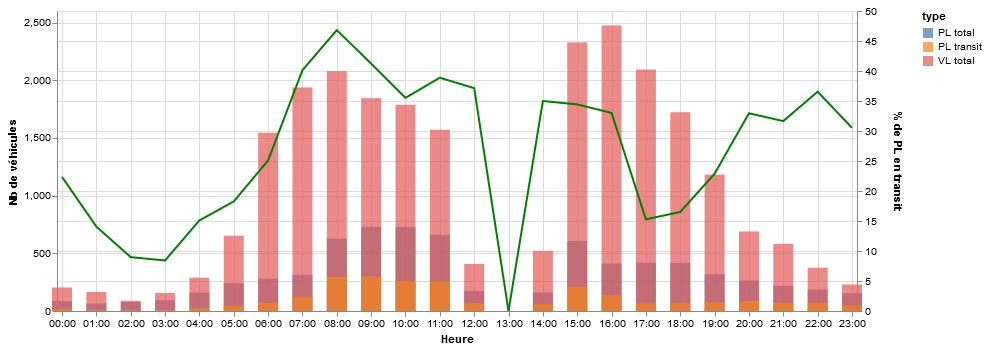

In [52]:
g.graph_VL_PL_transit_j_cam(synt_nb_veh_cam, '2019-01-29', 4)

## 7.2 Redressement au niveau de la Rocade

In [126]:
#determiner les passages fictifs
df_passage_transit_redresse, df_pl_redresse, trajets_rocade_non_vu=t.passages_fictif_rocade (t.liste_trajet_rocade, dico_od_final,dico_passag_final,df_pl)
#regrouper
%time synt_nb_veh_cam_redresse=t.pourcentage_pl_camera(df_pl_redresse,df_passage_transit_redresse, df_vl)

pl_tot =1920 , vl_tot=1920 , pl_transit=1262,pl_tot-joint-transit=1262
Wall time: 1.3 s


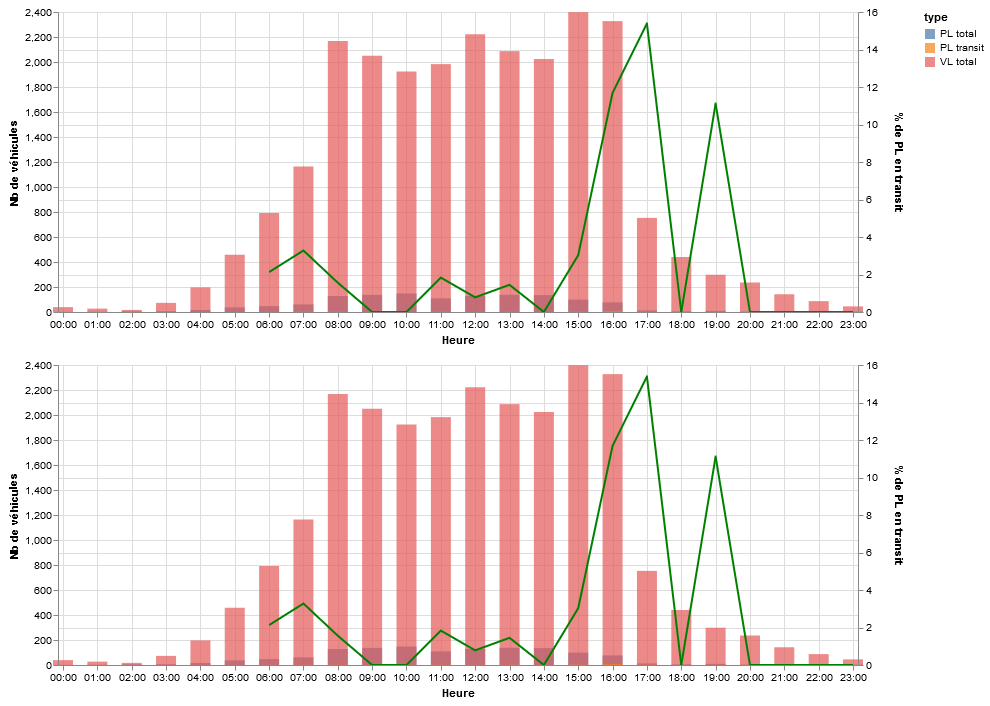

In [46]:
alt.vconcat(g.graph_VL_PL_transit_j_cam(synt_nb_veh_cam, '2019-01-28', 1),g.graph_VL_PL_transit_j_cam(synt_nb_veh_cam_redresse, '2019-01-28', 1))

## 7.3 Redressement des trajets extrapoles

>**A TESTER SUR JEU DE DONNEES COMPLET**

In [ ]:
# de même que opur la rocade, il faut ajouter des passages fictifs à la df des passages afin de pouvoir approximer mieux les parts de PL
#trouver les passages extrapoles
df_od_final.loc[df_od_final['correction_o_d_type']=='extrapole']
# tester la camera de debut :si c'est pas une des cameras d'entree - sortie du dispositif, on sait si le trajet est extrapole en début ou fin
#selon l'o_d crééer un passage fictuf avec le numero de la camera qui manque du trajets sensé avoir eu leiu
#estimer le temps de passage selon le temps theorique : date_cam_1 ou 2 +ou- temps ou temps theorique

## 7.4. Grouper les réusltats par JO

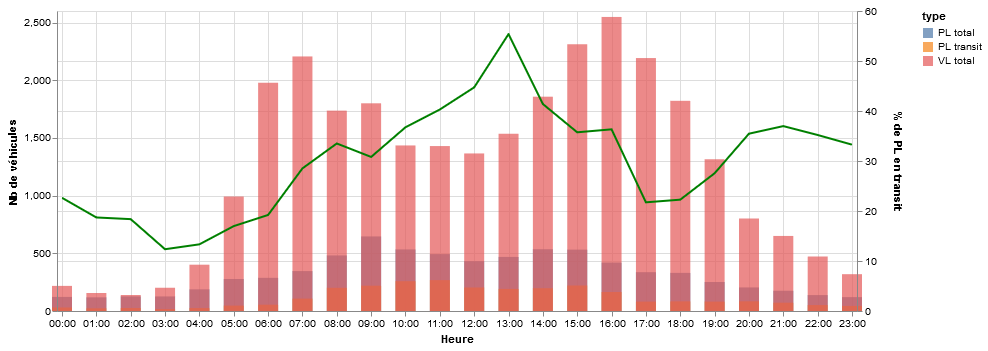

In [133]:
g.graph_VL_PL_transit_j_cam(synt_nb_veh_cam_redresse, 'JO', 4)

# 8. Temps de parcours

In [26]:
# on cherche à obtenir le temps de parcours moyen pour une camera, sur un jour ou les jours ouvres, par o_d
# on construit donc une df avec : immat, cam, tps_parcours, heure_Rocade
# pour l'heure à la Rocade : on va cehrcher dans les df_passage le passage:qui a la mm immat, dont la cam est 1,2,3,4 et dont le created est compris entre date_cam1et date_cam2

#isoler les passages concernes par la Rocade
passage_rocade=dico_passag_final.loc[(dico_passag_final['camera_id'].isin([1,2,3,4]))]# & (dico_passag_final['correction_o_d']==False)]

In [36]:
#jointure entre les o_d et les passages
o_d_joint_rocade=dico_od_final.merge(passage_rocade, on='immat', how='left')

In [109]:
#limiter les o_d là ou date du passages est ciompris entre les date 1 et date 2 de l'o_d
dico_od_Rocade_final=o_d_joint_rocade.loc[(o_d_joint_rocade['date_cam_1']<o_d_joint_rocade['created']) & 
                                          (o_d_joint_rocade['created']<o_d_joint_rocade['date_cam_2']) & 
                                          (o_d_joint_rocade['tps_parcours']<pd.Timedelta('4H'))]

In [155]:
#limiter les 
limite_donnees=dico_od_Rocade_final[['date_cam_1','immat','o_d','tps_parcours','created']].rename(columns={'created':'h_rocade'})

In [181]:
#filtrer selon une date ou des jours ouvrés ou mardi/jeudi : 
"""filtre_donnees=limite_donnees.loc[(limite_donnees.apply(lambda x : x['h_rocade'].dayofyear==pd.to_datetime('2019-01-28').dayofyear,axis=1)) & 
                          (pour_graph['o_d']=='A10-A62')].copy()"""
filtre_donnees=limite_donnees.loc[(limite_donnees.set_index('h_rocade').index.dayofweek<5) & 
                          (limite_donnees['o_d']=='A10-A63')].copy()
"""filtre_donnees=limite_donnees.loc[(limite_donnees.set_index('h_rocade').index.dayofweek.isin([1,3])) & 
                          (limite_donnees['o_d']=='A10-A62')].copy()"""

"filtre_donnees=limite_donnees.loc[(limite_donnees.set_index('h_rocade').index.dayofweek.isin([1,3])) & \n                          (limite_donnees['o_d']=='A10-A62')].copy()"

In [182]:
#transformer les valeur de temps en integer pour agregation
filtre_donnees['tps_parcours2']=filtre_donnees['tps_parcours'].values.astype(np.int64)

In [183]:
#mise en forme pour graph
groupe_h=filtre_donnees.set_index('h_rocade').resample('15T')['tps_parcours2'].mean()
#groupe_h['tps_parcours']=pd.to_timedelta(groupe_h['tps_parcours'])
groupe_h=pd.to_timedelta(groupe_h)
pour_graph=groupe_h.reset_index()
pour_graph['tps_parcours2']=pd.to_datetime('2019-01-31')+pour_graph['tps_parcours2']

In [185]:
pour_graph

,h_rocade,tps_parcours2
0,2019-01-28 01:30:00,2019-01-31 01:27:18.000000000
1,2019-01-28 01:45:00,NaT
2,2019-01-28 02:00:00,NaT
3,2019-01-28 02:15:00,2019-01-31 01:35:16.000000000
4,2019-01-28 02:30:00,NaT
5,2019-01-28 02:45:00,2019-01-31 01:11:47.000000000
6,2019-01-28 03:00:00,2019-01-31 01:38:07.000000000
7,2019-01-28 03:15:00,NaT
8,2019-01-28 03:30:00,NaT
9,2019-01-28 03:45:00,NaT


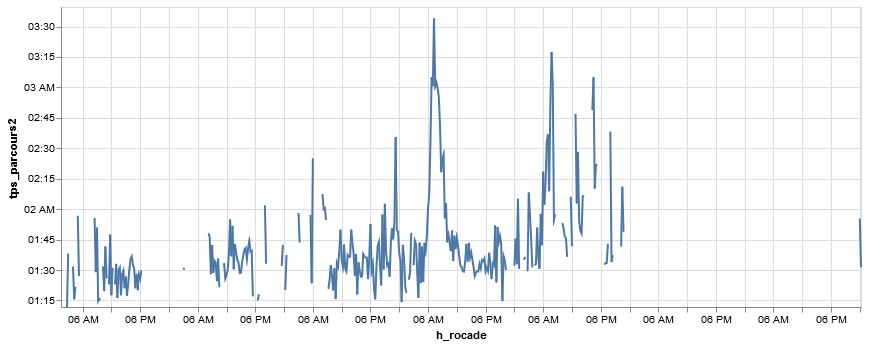

In [184]:
alt.Chart(pour_graph).mark_line().encode(
    x='h_rocade:T',
    y='tps_parcours2').properties(width=800)

In [ ]:
dico_od_final.loc[(dico_od_final['o_d']=='A10-A62') & (dico_od_final['date_cam_1']>pd.to_datetime('2019-01-28 21:00'))].sort_values('date_cam_1')

In [559]:
test=t.trajet(df_passages6.loc['2019-01-31 00:00:00':'2019-02-01 23:59:59'], '2019-01-31 08:15:00', 15, [8, 13],typeTrajet='Global',temps_max_autorise=18)

In [547]:
param_cluster=pd.read_json(r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\param_cluster.json', orient='index')

In [563]:
visu=t.jointure_temps_reel_theorique(test.df_transit,dixco_tpsmax_corrige,t.liste_complete_trajet, 15)

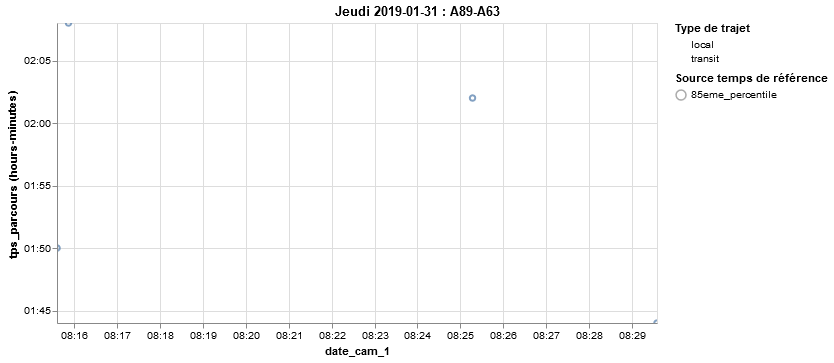

In [564]:
g.graph_transit_filtre(visu,'2019-01-31 00:00:00','2019-01-31 23:59:59','A89-A63')

# CORRIGER LES TEMPS DE PARCOURS LIMITES

In [1238]:
#isoler les données : sur un jour pour une o_d
o_d='A10-A63'
date='2019-02-06'
test_predict=df_transit_avec_filtre.loc[(df_transit_avec_filtre['o_d']==o_d) &
             (df_transit_avec_filtre.set_index('date_cam_1').index.dayofyear==pd.to_datetime(date).dayofyear)].copy()

In [1239]:
#ajouter des champsde ocnversion des dates en integer, limiter les valeusr sinon pb de mémoire avec sklearn
test_predict['date_int']=((test_predict.date_cam_1 - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s'))/1000000
test_predict['temps_int']=(((pd.to_datetime('2018-01-01')+test_predict.tps_parcours) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s'))/1000000

In [1074]:
#créer les données d'entrée du modele
X=np.array([[a,b] for a,b in zip(test_predict.date_int.tolist(),test_predict.temps_int.tolist())])
y=np.array(test_predict.filtre_tps.tolist())

In [1075]:
#créer le modele
ga=1000
C=35
clf = svm.SVC(kernel='rbf', gamma=ga, C=C)

In [1076]:
#alimenter le modele
clf.fit(liste_nsample_nfeat, n_sample)

SVC(C=35, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1000, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [1077]:
#isoler les donner à tester
df_a_tester=test_predict.loc[(test_predict['filtre_tps']==0) & (test_predict['type']=='85eme_percentile')].copy()

In [1078]:
#liste à tester
liste_a_tester=np.array([[a,b] for a,b in zip(df_a_tester.date_int.tolist(),df_a_tester.temps_int.tolist())])
#dfde résultats de prédiction
df_type_predit=pd.DataFrame([[i, v] for i,v in zip(df_a_tester.index.tolist(),[clf.predict([x])[0] for x in liste_a_tester])], 
                            columns=['index_source','type_predit'])
#mise à jourde la df source
df_transit_avec_filtre.loc[df_transit_avec_filtre.index.isin(df_type_predit.index_source.tolist()),'type']='predit'
df_transit_avec_filtre.loc[df_transit_avec_filtre.index.isin(df_type_predit.loc[df_type_predit['type_predit']==1].index_source.tolist()),'filtre_tps']=1

In [1172]:
df_transit_avec_filtre.loc[df_transit_avec_filtre['type']=='predit']

,date_cam_1,immat,l,state,id,date_cam_2,cameras,origine,destination,o_d,tps_parcours,period,date,temps,type,tps_parcours_theoriq,filtre_tps


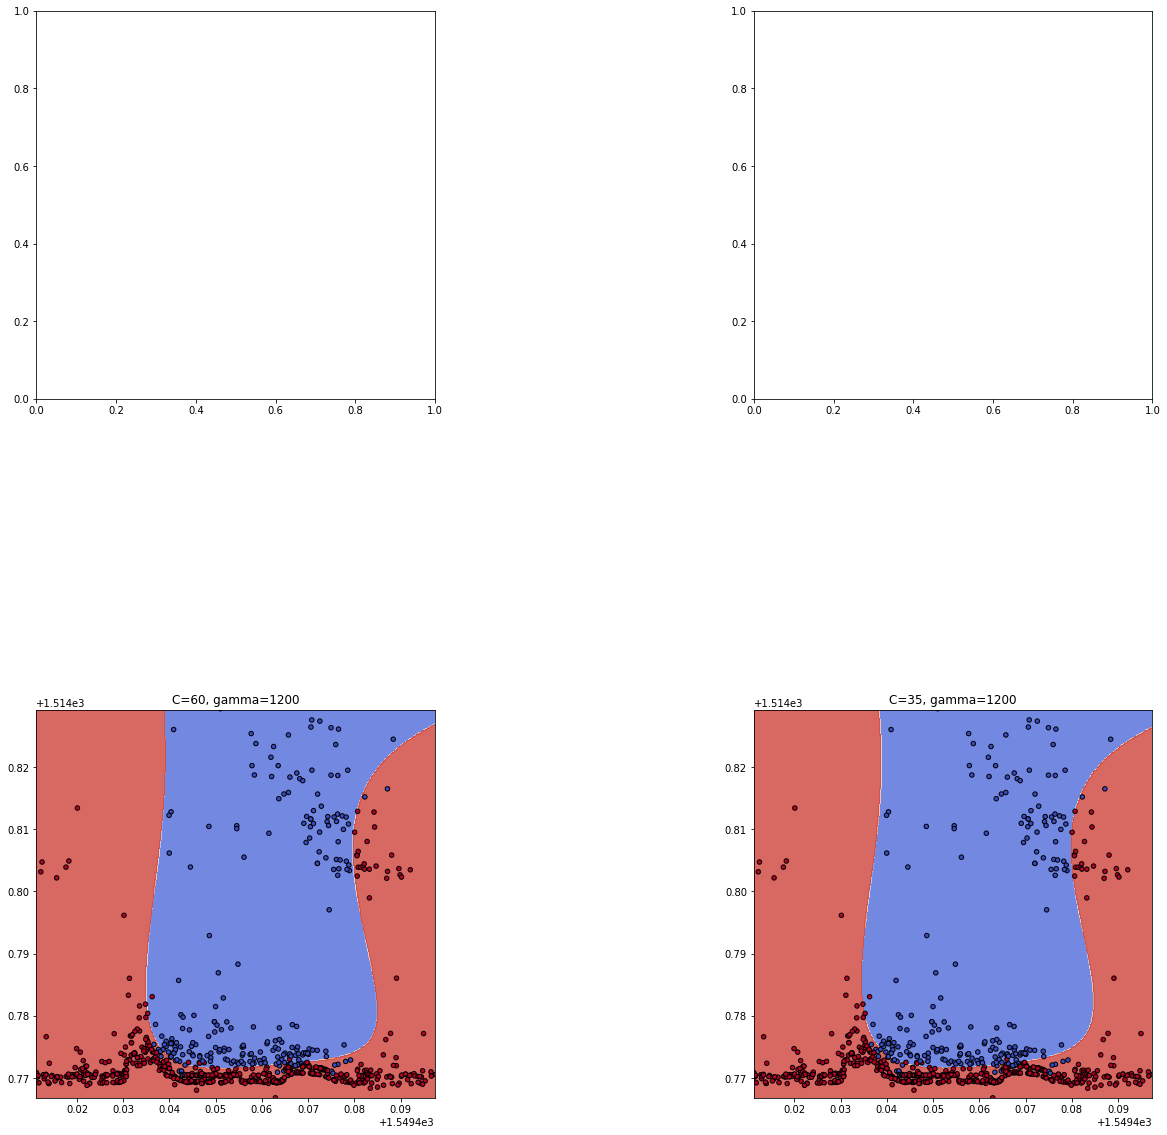

Wall time: 1.86 s


In [1240]:
%%time
def make_meshgrid(x, y, h=.0002):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 0.000000001, x.max() + 0.000000001
    y_min, y_max = y.min() - 0.000000001, y.max() + 0.000000001
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

X=np.array([[a,b] for a,b in zip(test_predict.date_int.tolist(),test_predict.temps_int.tolist())])
y=np.array(test_predict.filtre_tps.tolist())
#C = 25# SVM regularization parameter
models = (svm.SVC(kernel='rbf', gamma=600, C=70),
         svm.SVC(kernel='rbf', gamma=600, C=35),
         svm.SVC(kernel='rbf', gamma=500, C=100),
         svm.SVC(kernel='rbf', gamma=500, C=200))
models = (clf.fit(X, y) for clf in models)


# Set-up 2x2 grid for plotting.
fig, sub = plt.figure(figsize=(20,20)).subplots(2,2)
plt.subplots_adjust(wspace=0.8, hspace=0.8)

# title for the plots
titles = ('C=60, gamma=1200',
          'C=35, gamma=1200',
          'C=100, gamma=500',
          'C=200, gamma=500')

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)

plt.show()

In [ ]:
liste_od_ok=['A660-A62','A62-A63','A63-A62','A62-A10','A660-N10', 'A660-A10','N10-A63','A62-N10']
for od in [x for x in df_transit_avec_filtre.o_d.unique().tolist() if x not in liste_od_ok ] : 
    for date in set([a[0].strftime('%Y-%m-%d') for a in t.creer_liste_date('2019-01-31',11)]):
        try : 
            df_transit_avec_filtre=t.predire_type_trajet(df_transit_avec_filtre,od, date,600,35)
        except ValueError : 
            continue

# VERIF AFFECTATION CLUSTER

vlaueError


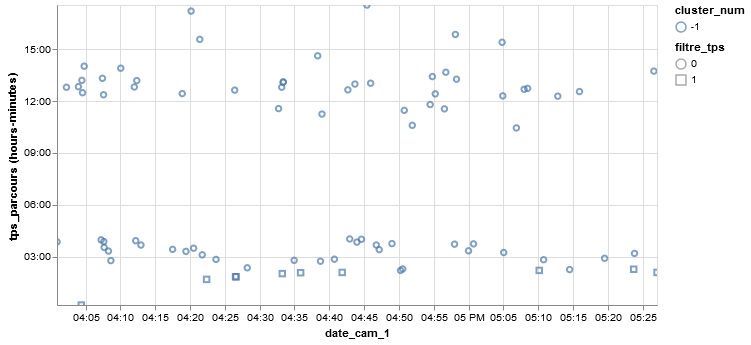

In [1237]:
#test cluster
od='A63-A10'
date_debut='2019-02-06 16:00:00'
datefin='2019-02-06 17:30:00'
delai=700
coeff=15
df_pl_ok=df_transit_avec_filtre.loc[(df_transit_avec_filtre['o_d']==od) &
                                   (df_transit_avec_filtre['date_cam_1'].between(pd.to_datetime(date_debut),pd.to_datetime(datefin)))]
donnees_src=df_pl_ok.loc[:,['date_cam_1','tps_parcours']].copy() #isoler les données necessaires
liste_valeur=donnees_src.tps_parcours.apply(lambda x : ((pd.to_datetime('2018-01-01')+x)-pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')).tolist()#convertir les temps en integer
liste_date=donnees_src.date_cam_1.apply(lambda x :(x - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')).tolist()
liste=[[liste_date[i],liste_valeur[i]] for i in range(len(liste_valeur))]
if len(liste_valeur)<5 : #si il n'y a pas bcp de pl on arrete ; pourraitfair l'objet d'un parametre
    raise ClusterError()
#faire tourner la clusterisation et recupérer le label (i.e l'identifiant cluster) et le nombre de cluster
clustering=DBSCAN(eps=delai, min_samples=len(liste_valeur)/coeff).fit(liste)

labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# A AMELIORER EN CREANT UNE ERREUR PERSONALISEE SI ON OBTIENT  CLUSTER
if n_clusters_== 0 :
    print('vlaueError')
#mettre en forme au format pandas
results = pd.DataFrame(pd.DataFrame([donnees_src.index,labels]).T)
results.columns = ['index_base', 'cluster_num']
results = pd.merge(results,df_pl_ok, left_on='index_base', right_index=True )
graph_results=results[['date_cam_1','tps_parcours','filtre_tps','cluster_num']].copy()
graph_results.tps_parcours=pd.to_datetime('2018-01-01')+graph_results.tps_parcours
alt.Chart(graph_results).mark_point().encode(
                                x='date_cam_1',
                                y='hoursminutes(tps_parcours)',
                                tooltip='hoursminutes(tps_parcours)',
                                color='cluster_num:N',
                                shape='filtre_tps:N').interactive().properties(width=600)

In [1206]:
t.param_cluster

,delai,nb_pt_min,temps_etudie,trajet
0,600,4,15,"[A10-A63, A89-A63, A62-A63, A10-A62, N10-A62, A89-A62, A10-A89, N10-A89, A10-A660, N10-A660, A89-A660, A62-A660]"
1,1200,4,60,"[A10-A63, N10-A63, A89-A63, A62-A63, A10-A62, N10-A62, A89-A62, A10-A89, N10-A89, A10-A660, N10-A660, A89-A660, A62-A660]"
2,800,3,15,"[A63-A10, A63-N10, A63-A89, A63-A62, A62-A10, A62-N10, A62-A89, A89-A10, A89-N10, A660-A10, A660-N10, A660-A89, A660-A62]"
3,1000,4,60,"[A63-A10, A63-N10, A63-A89, A63-A62, A62-A10, A62-N10, A62-A89, A89-A10, A89-N10, A660-A10, A660-N10, A660-A89, A660-A62]"
4,1000,4,15,N10-A63
